# Construction/Starts

## Notebook Links:
[Home](index.ipynb)

[Resale Market](resales.ipynb)

[Construction/Starts](starts.ipynb)

[Rental Market](rental.ipynb)

[Economic Drivers](economics.ipynb)

[Demograhics/Migration](demographics.ipynb)

## HTML Links:
[Home](index.html)

[Resale Market](resales.html)

[Construction/Starts](starts.html)

[Rental Market](rental.html)

[Economic Drivers](economics.html)

[Demograhics/Migration](demographics.html)

Data on starts, construction activity in Calgary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='Arial')


## SAAR

In [37]:
saar = pd.read_csv('..\\data\\pareto\\single_starts_saar.csv',index_col=0)
saar=saar.join(pd.read_csv('..\\data\\pareto\\multi_starts_saar.csv',index_col=0))
saar=saar.join(pd.read_csv('..\\data\\pareto\\total_starts_saar.csv',index_col=0))
saar.index=saar.index.rename('Date')
saar.index=pd.DatetimeIndex(saar.index,freq='QS-OCT')
saar=saar.dropna()


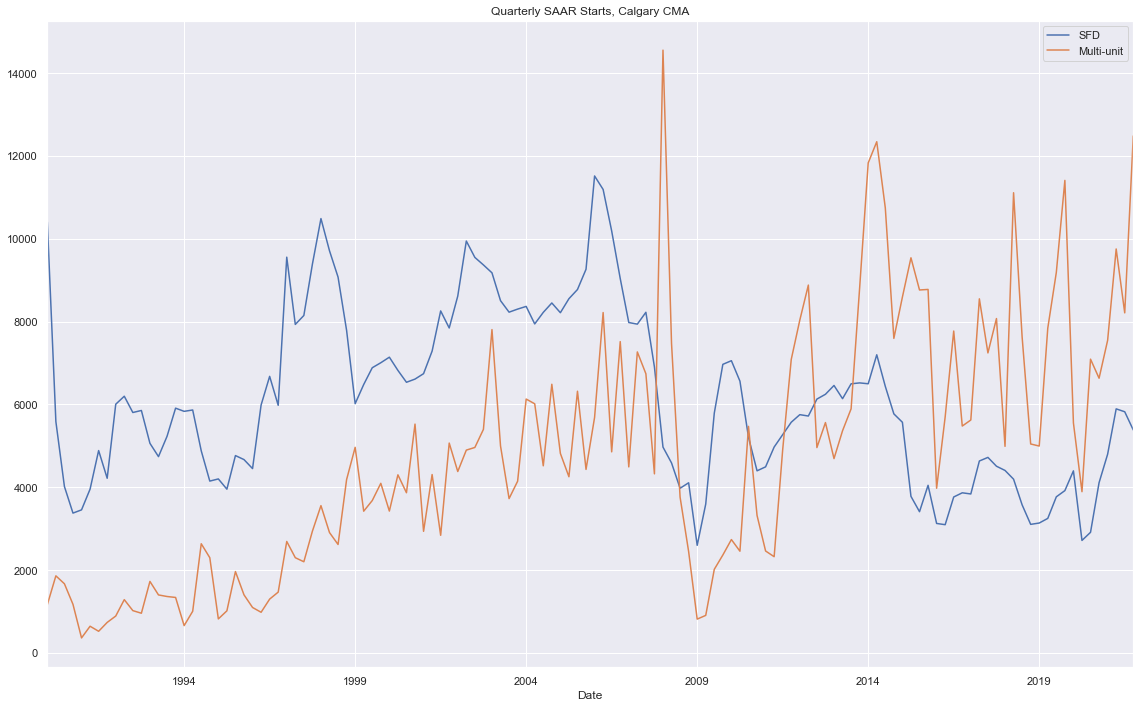

In [38]:
(saar[['single_starts_saar','multi_starts_saar']]*1000).plot(title='Quarterly SAAR Starts, Calgary CMA', figsize=(16,10))
plt.legend(['SFD','Multi-unit'])
plt.tight_layout()
plt.savefig('kbase_graphs/saar_full.png')

Construction activity grew following economic and population growth in the 90s. The vast majority of multi-unit starts occurred after the late 90s, and housing stock reflects that. Interestingly, single detached starts were much stronger before the 2008 Financial crisis, and activity has not recovered since. On the other hand, multi-unit starts remained strong in the period leading up to 2014, and in the period after. This could be explained by the decreasing amount of land easily available for new single detached home construction, or a switch to a more urban city - limiting urban sprawl.

## Total Starts

In [39]:
tot_st = pd.read_csv('..\\data\\pareto\\starts_homeowner.csv',index_col=0)
tot_st=tot_st.join(pd.read_csv('..\\data\\pareto\\starts_condo.csv',index_col=0))
tot_st=tot_st.join(pd.read_csv('..\\data\\pareto\\starts_rental.csv',index_col=0))
tot_st=tot_st.join(pd.read_csv('..\\data\\pareto\\starts_coop.csv',index_col=0))
tot_st=tot_st.join(pd.read_csv('..\\data\\pareto\\starts_other.csv',index_col=0))
tot_st.index=tot_st.index.rename('Date')
tot_st=tot_st.dropna()

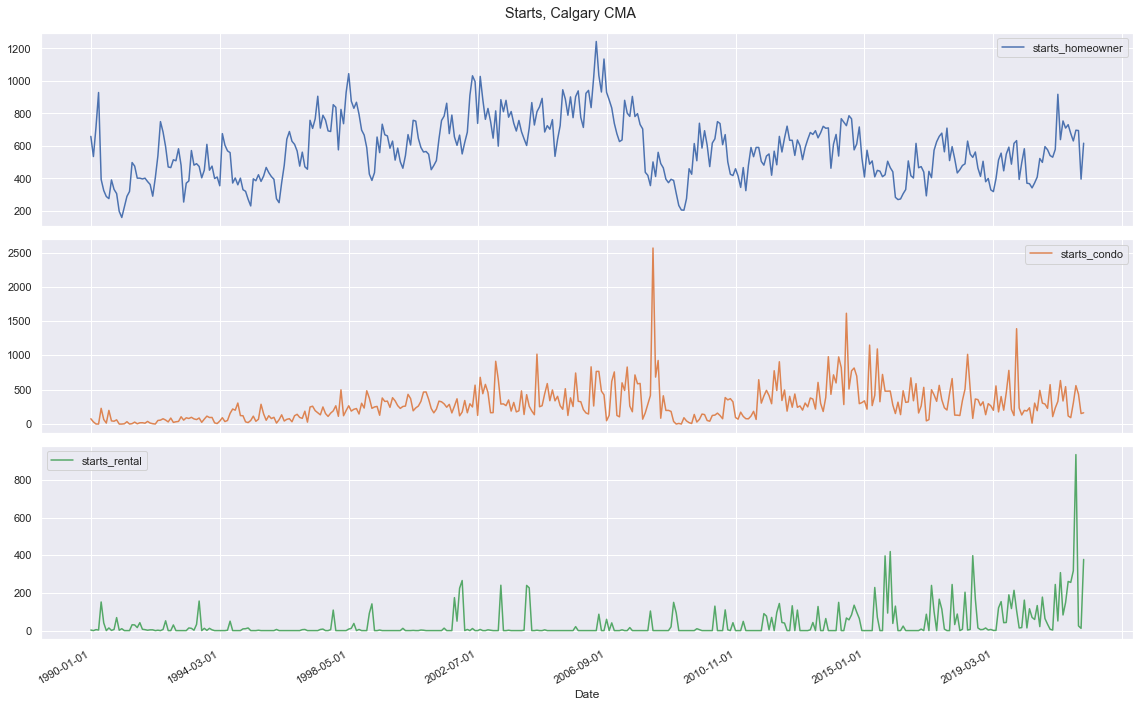

In [40]:

tot_st[['starts_homeowner','starts_condo','starts_rental']]['1990':].plot(subplots=True,title='Starts, Calgary CMA',legend=True,figsize=(16,10),label=['Homeowner','Condo','Rental'])

plt.tight_layout()
plt.savefig('kbase_graphs/tot_starts_full.png')

Homeowner starts have been fairly stable for the past decade, while condo starts saw a larger range after 2010. Most rental starts in the past 30 years took place in the past decade, reflecting older rental stock being replaced by newer stock, and the demand for newer product.

## Semi-detached Starts

In [41]:
semi = pd.read_csv('..\\data\\pareto\\semi_homeowner.csv',index_col=0)
semi=semi.join(pd.read_csv('..\\data\\pareto\\semi_rental.csv',index_col=0))
semi=semi.join(pd.read_csv('..\\data\\pareto\\semi_coop.csv',index_col=0))
semi=semi.join(pd.read_csv('..\\data\\pareto\\semi_condo.csv',index_col=0))
semi=semi.join(pd.read_csv('..\\data\\pareto\\semi_other.csv',index_col=0))
semi.index=semi.index.rename('Date')
semi=semi.dropna()

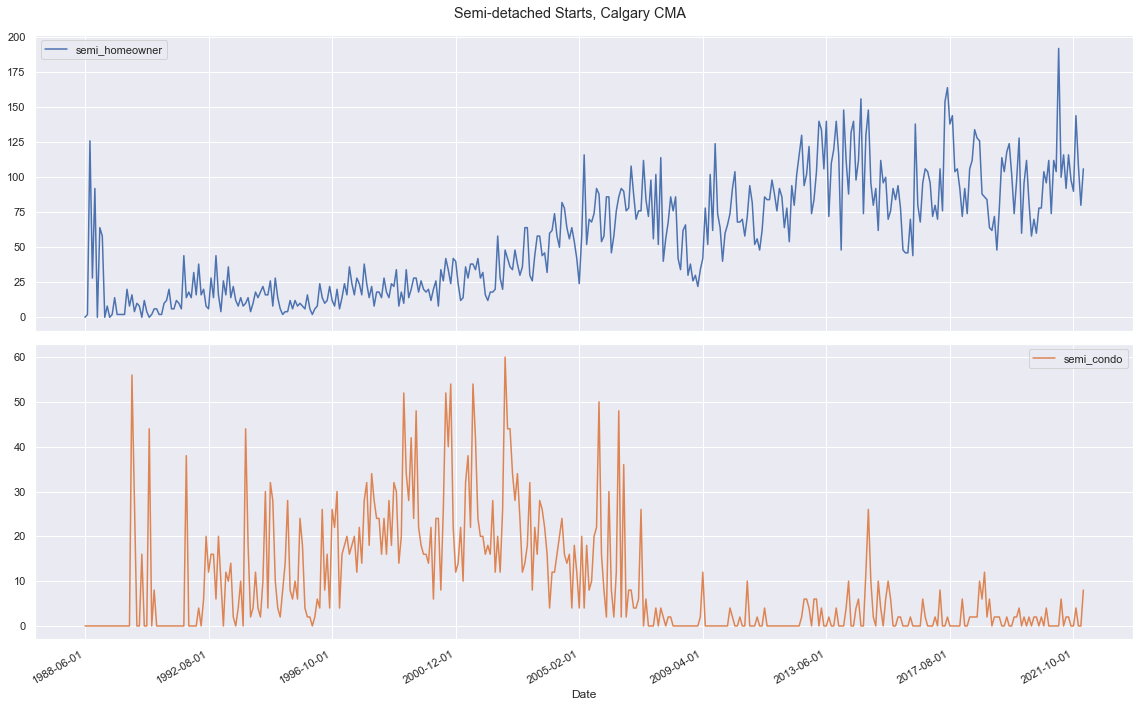

In [42]:
semi[['semi_homeowner','semi_condo']].plot(figsize=(16,10),subplots=True, title = 'Semi-detached Starts, Calgary CMA')


plt.tight_layout()
plt.savefig('kbase_graphs/semi_starts_full.png')

Interestingly here we can see that Semi detached homeowner starts have been on an uptrend since 2008. At the same time, semi-detached condo starts are essentially non-existent in Calgary in the past 12-13 years. All semi-detached condo construction has been replaced by homeowner types. 

## Row/Townhouse Starts

In [43]:
row = pd.read_csv('..\\data\\pareto\\row_homeowner.csv',index_col=0)
row=row.join(pd.read_csv('..\\data\\pareto\\row_rental.csv',index_col=0))
row=row.join(pd.read_csv('..\\data\\pareto\\row_coop.csv',index_col=0))
row=row.join(pd.read_csv('..\\data\\pareto\\row_condo.csv',index_col=0))
row=row.join(pd.read_csv('..\\data\\pareto\\row_other.csv',index_col=0))
row.index=row.index.rename('Date')
row=row.dropna()

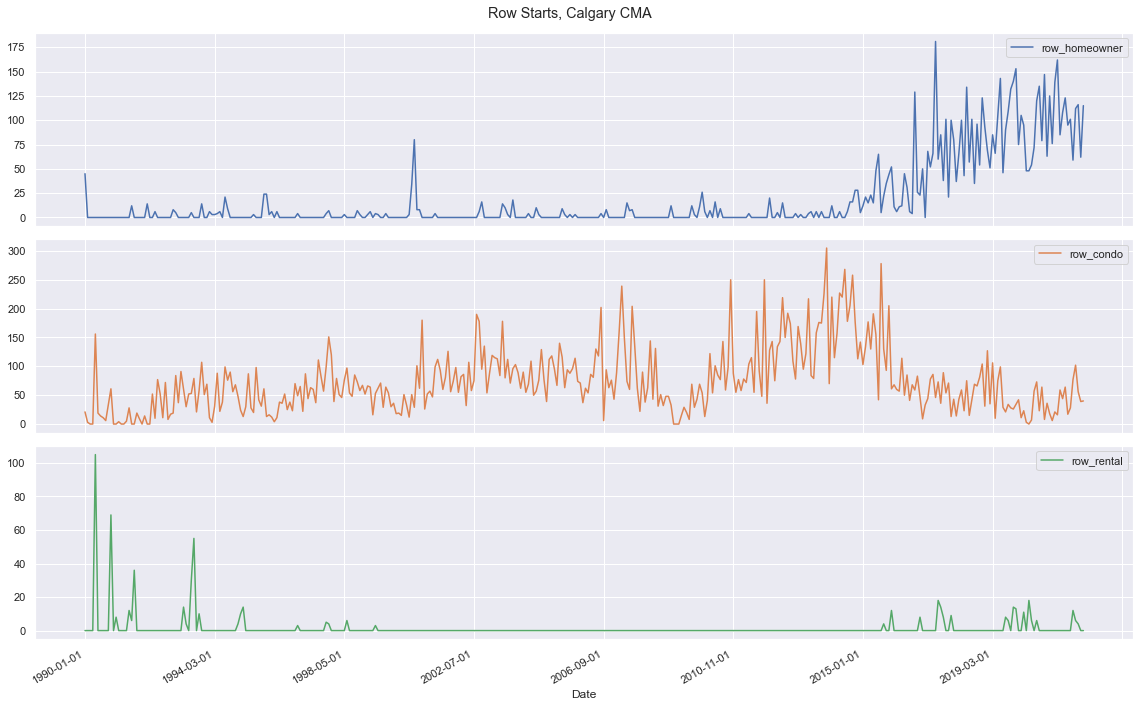

In [44]:
row[['row_homeowner','row_condo', 'row_rental']]['1990':].plot(figsize=(16,10),subplots=True, title = 'Row Starts, Calgary CMA')

plt.tight_layout()
plt.savefig('kbase_graphs/row_starts_full.png')

At the same time, row/townhouse construction saw increased growth in the homeowner segment starting around 2015, while condo starts have decreased. Historically, the vast majority of row starts in Calgary were condo. Rental townhomes are also largely nonexistent.

## Apartment Starts

In [45]:
apart = pd.read_csv('..\\data\\pareto\\apart_homeowner.csv',index_col=0)
apart=apart.join(pd.read_csv('..\\data\\pareto\\apart_rental.csv',index_col=0))
apart=apart.join(pd.read_csv('..\\data\\pareto\\apart_coop.csv',index_col=0))
apart=apart.join(pd.read_csv('..\\data\\pareto\\apart_condo.csv',index_col=0))
apart=apart.join(pd.read_csv('..\\data\\pareto\\apart_other.csv',index_col=0))
apart.index=apart.index.rename('Date')
apart=apart.dropna()

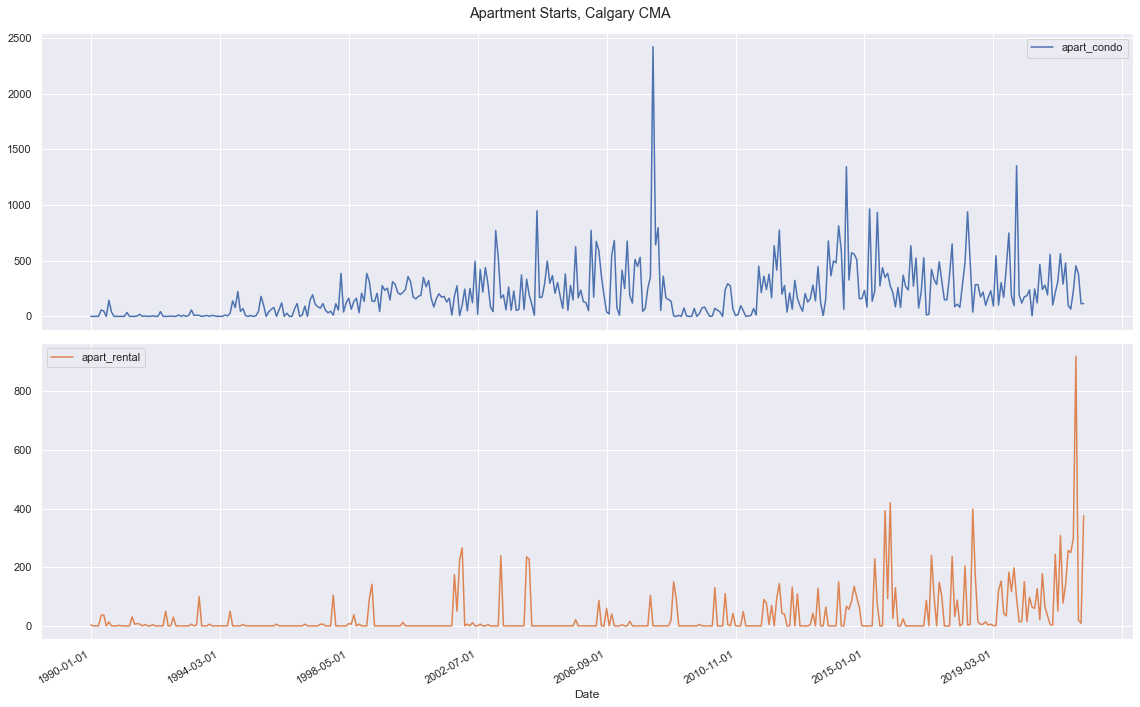

In [46]:
apart[['apart_condo', 'apart_rental']]['1990':].plot(figsize=(16,10),subplots=True, title = 'Apartment Starts, Calgary CMA')

plt.tight_layout()
plt.savefig('kbase_graphs/apt_starts_full.png')

Rental apartment starts largely reflects total rental starts - majority of primary rental units are apartment based. While apartment/condo starts have been elevated since 2014, with significant development in 2021.

## Geographic Starts

In [56]:
import geopandas as gpd
ct = gpd.read_file(r"../geo/lct_000b16a_e.zip")
cal_ct = ct[ct['CMANAME']=='Calgary']
columns = ['CTUID','Condo','Freehold','Rental','Total']
apt_starts=pd.read_excel('../starts_geo/Apt_Number of Housing Starts by CT, units.xlsx',engine = 'openpyxl',names=columns)
apt_starts = apt_starts[1:-2]

In [57]:
apt_starts['CTUID']=apt_starts['CTUID'].map('{:.2f}'.format)
apt_starts['CTUID']=apt_starts['CTUID'].astype(str)
merged_starts = cal_ct.merge(apt_starts,on='CTUID')
merged_starts=merged_starts.to_crs(epsg='3857')
top_five = merged_starts.sort_values(by="Total",ascending=False)[:5]

In [58]:
import geoplot as gplt
import geoplot.crs as gcrs
import contextily as cx

### Apartment Starts

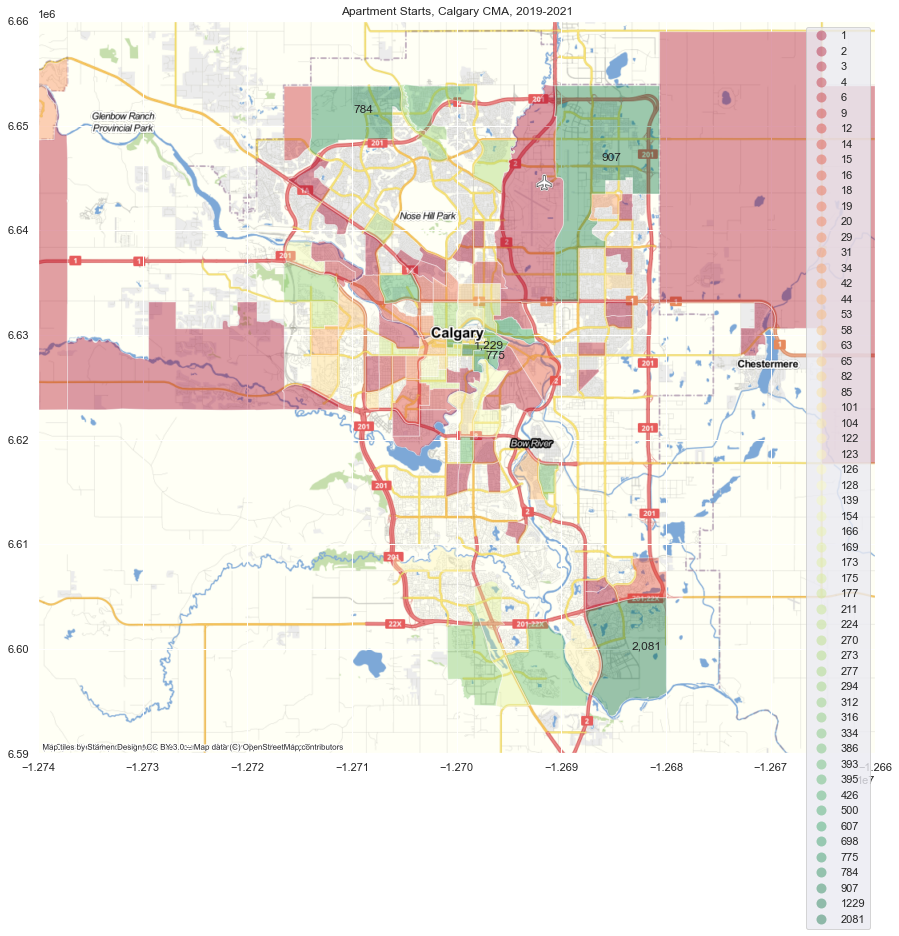

In [59]:
fig,ax = plt.subplots(1,1,figsize=(15,15))
ax.set_title('Apartment Starts, Calgary CMA, 2019-2021')
merged_starts.to_crs(epsg='3857').plot(column='Total',cmap='RdYlGn',edgecolor='white', ax=ax,alpha = 0.4, legend = True)
for x, y, label in zip(top_five.geometry.centroid.x, top_five.geometry.centroid.y, top_five['Total']):
    ax.annotate("{:,.0f}".format(label), xy=(x, y), xytext=(1, 1), textcoords="offset points")
minx=-1.274*10**7
maxx=-1.266*10**7
miny=6.59*10**6
maxy=6.66*10**6
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
cx.add_basemap(ax ,source=cx.providers.OpenStreetMap.BZH)
cx.add_basemap(ax ,source=cx.providers.Stamen.TonerLabels)
plt.savefig('kbase_graphs/apt_starts.png',facecolor='white',transparent=False,dpi=300)

### SFD Starts

In [60]:
sfd_starts=pd.read_excel('../starts_geo/SFD_Number of Housing Starts by CT, units.xlsx',engine = 'openpyxl',names=columns)
sfd_starts = sfd_starts[1:-2]
sfd_starts['CTUID']=sfd_starts['CTUID'].map('{:.2f}'.format)
sfd_starts['CTUID']=sfd_starts['CTUID'].astype(str)
merged_starts = cal_ct.merge(sfd_starts,on='CTUID')
merged_starts=merged_starts.to_crs(epsg='3857')
top_five = merged_starts.sort_values(by="Total",ascending=False)[:5]

C:\Users\Maln\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


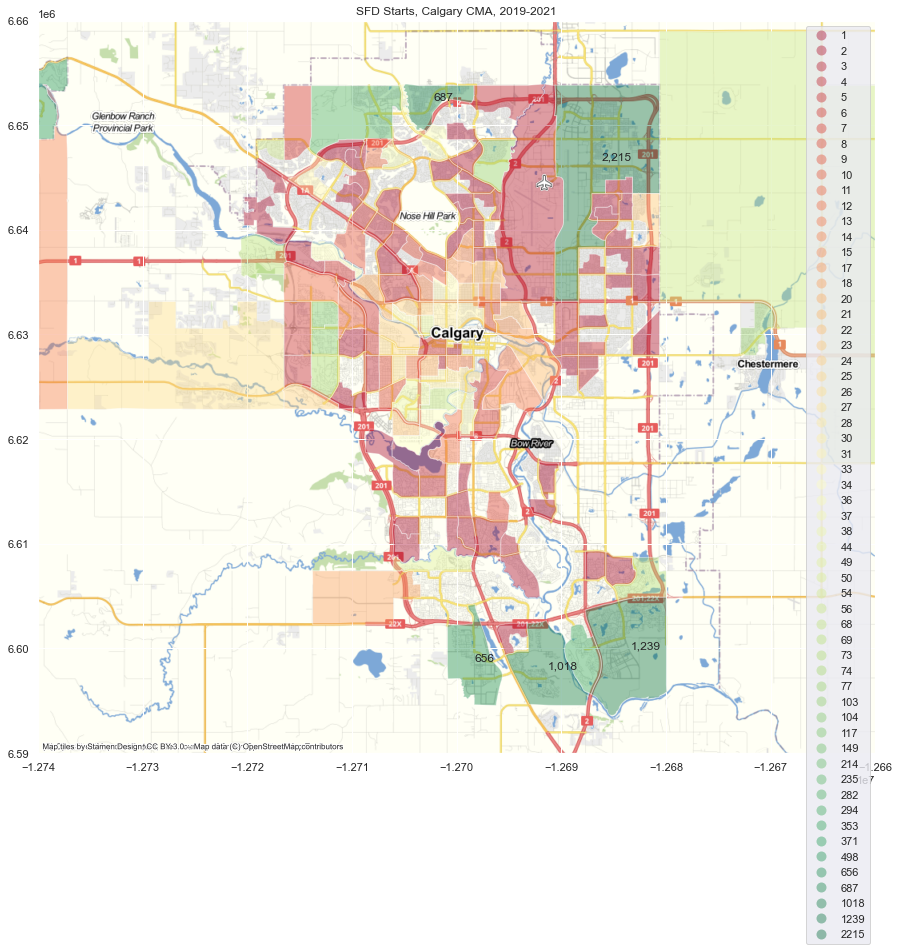

In [62]:
fig,ax = plt.subplots(1,1,figsize=(15,15))
ax.set_title('SFD Starts, Calgary CMA, 2019-2021')
merged_starts.plot(column='Total',cmap='RdYlGn',edgecolor='white', ax=ax,alpha = 0.4, legend = True)
for x, y, label in zip(top_five.geometry.centroid.x, top_five.geometry.centroid.y, top_five['Total']):
    ax.annotate("{:,.0f}".format(label), xy=(x, y), xytext=(1, 1), textcoords="offset points")
minx=-1.274*10**7
maxx=-1.266*10**7
miny=6.59*10**6
maxy=6.66*10**6
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
cx.add_basemap(ax ,source=cx.providers.OpenStreetMap.BZH)
cx.add_basemap(ax ,source=cx.providers.Stamen.TonerLabels)
plt.savefig('kbase_graphs/sfd_starts.png',facecolor='white',transparent=False,dpi=300)

## Complete and Unabsorbed Inventory

In [47]:
unabsorb = pd.read_csv('..\\data\\pareto\\sfd_unabsorb.csv',index_col=0)
unabsorb=unabsorb.join(pd.read_csv('..\\data\\pareto\\row_apart_unabsorb.csv',index_col=0))
unabsorb=unabsorb.join(pd.read_csv('..\\data\\pareto\\row_unabsorb.csv',index_col=0))
unabsorb=unabsorb.join(pd.read_csv('..\\data\\pareto\\total_unabsorb.csv',index_col=0))
unabsorb.index=unabsorb.index.rename('Date')
unabsorb['apart_unabsorb']=unabsorb['row_apart_unabsorb']-unabsorb['row_unabsorb']
unabsorb=unabsorb.dropna()

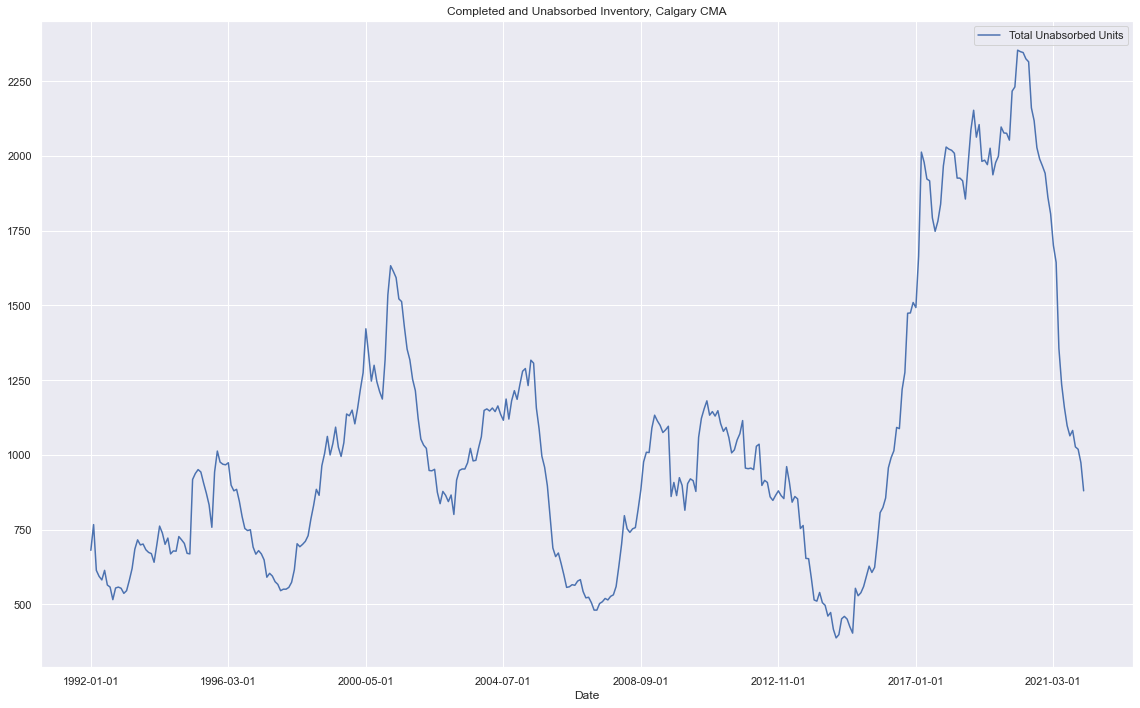

In [48]:

unabsorb['total_unabsorb'].plot(title='Completed and Unabsorbed Inventory, Calgary CMA', figsize=(16,10))
plt.legend(['Total Unabsorbed Units'])
plt.tight_layout()
plt.savefig('kbase_graphs/unabsorb_tot.png')

Completed and unabsorbed inventory have greatly decreased since peaking in early 2020. Growth in unabsorbed inventory began after the oil bust as demand evaporated in the housing market, while units under construction continued to come onto the market. 

At current points, unabsorbed inventory has fallen to 2012 levels, and is likely to continue falling for the short term.

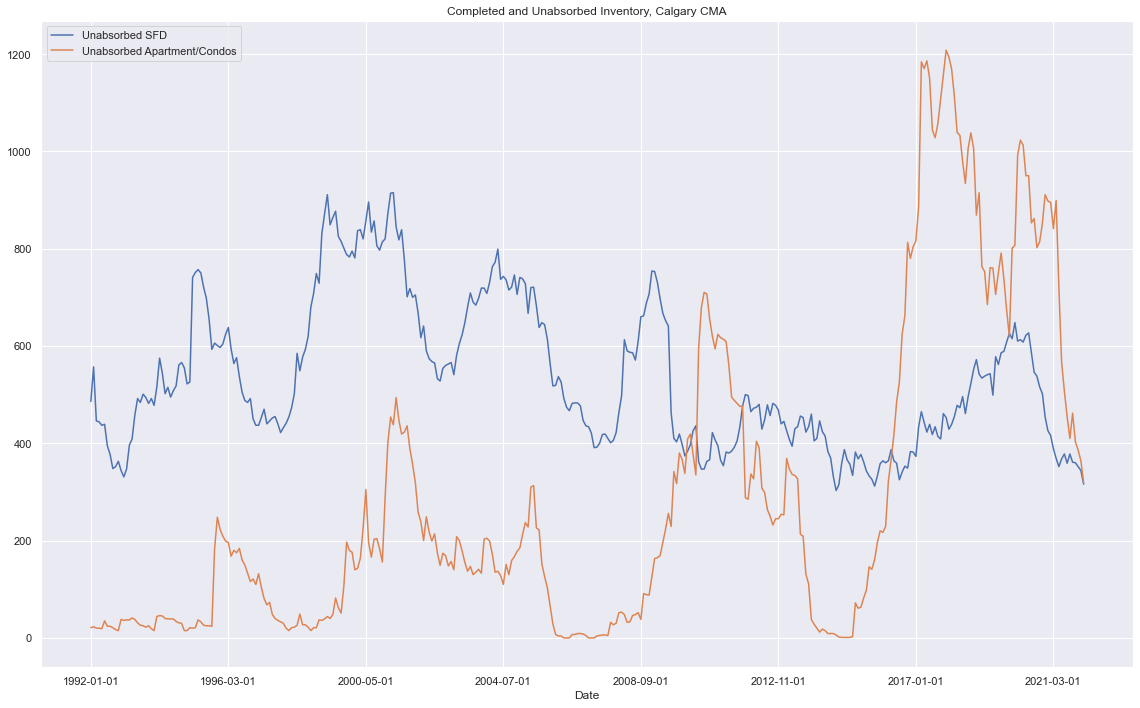

In [50]:
unabsorb[['sfd_unabsorb','apart_unabsorb']].plot(title='Completed and Unabsorbed Inventory, Calgary CMA', figsize=(16,10))
plt.legend(['Unabsorbed SFD','Unabsorbed Apartment/Condos'])
plt.tight_layout()
plt.savefig('kbase_graphs/unabsorb_sfd_apt.png')

While demand for new single detached homes have been fairly steady in the past decade, increased demand was evident in 2020. Unabsorbed condo inventory also drewdown a bit later than condos, but at a faster pace. The majority of unabsorbed inventory were apartment/condos in the past decade, but that is no longer the case.